In [1]:
import pandas as pd
import seaborn as sn

In [ ]:
"""You are given bhp.csv which contains property prices in the city of banglore, India. 
You need to examine price_per_sqft column and do following,

1. Remove outliers using percentile technique first. Use [0.001, 0.999] for lower and upper bound percentiles
2. After removing outliers in step 1, you get a new dataframe.
3. On step(2) dataframe, use 4 standard deviation to remove outliers
4. Plot histogram for new dataframe that is generated after step (3). Also plot bell curve on same histogram
5. On step(2) dataframe, use zscore of 4 to remove outliers. This is quite similar to step (3) and you will get exact same result"""

In [2]:
df = pd.read_csv("bhp.csv")
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [52]:
df.price_per_sqft.describe()

count    1.320000e+04
mean     7.920337e+03
std      1.067272e+05
min      2.670000e+02
25%      4.267000e+03
50%      5.438000e+03
75%      7.317000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [57]:
min_threshold, max_threshold=df.price_per_sqft.quantile([0.001,0.999])
min_threshold, max_threshold

(1366.184, 50959.36200000098)

In [58]:
outliers = df[(df.price_per_sqft > max_threshold) | (df.price_per_sqft<min_threshold)]
outliers.sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
8307,Bannerghatta Road,5 BHK,2500.0,4.0,1400.0,5,56000
3934,other,1 BHK,1500.0,1.0,19.5,1,1300
4924,other,7 BHK,5.0,7.0,115.0,7,2300000
5417,Ulsoor,4 BHK,36000.0,4.0,450.0,4,1250
6356,Bommenahalli,4 Bedroom,2940.0,3.0,2250.0,4,76530
12355,other,4 BHK,16335.0,4.0,149.0,4,912
9436,Indira Nagar,4 Bedroom,2400.0,5.0,1250.0,4,52083
345,other,3 Bedroom,11.0,3.0,74.0,3,672727
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000
7575,other,1 BHK,425.0,1.0,750.0,1,176470


In [62]:
df2 = df[(df.price_per_sqft < max_threshold) & (df.price_per_sqft > min_threshold)]
df2.shape

(13172, 7)

<AxesSubplot:xlabel='price_per_sqft', ylabel='Count'>

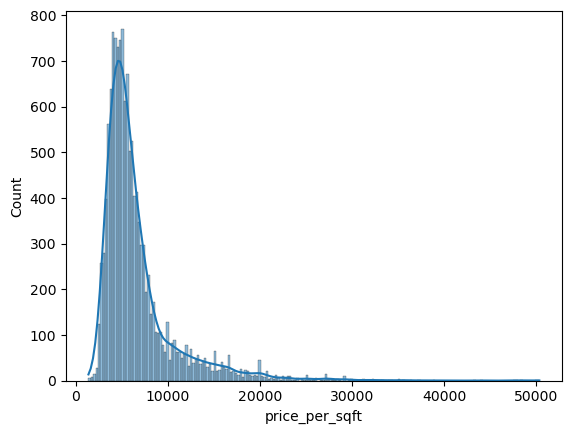

In [63]:
sn.histplot(df2.price_per_sqft, kde=True)


In [66]:
mean = df2.price_per_sqft.mean()
mean

6663.6537351958705

In [78]:
standard_deviation = df2.price_per_sqft.std()
standard_deviation

4141.020700174605

In [81]:
mean + 4*standard_deviation

23227.73653589429

In [83]:
mean - 4*standard_deviation

-9900.429065502549

In [82]:
df2[df2.price_per_sqft > 23227.73653589429]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333
190,Bellandur,4 Bedroom,1200.0,5.0,325.0,4,27083
733,Cunningham Road,4 BHK,5270.0,4.0,1250.0,4,23719
760,other,9 Bedroom,600.0,9.0,190.0,9,31666
...,...,...,...,...,...,...,...
13081,other,6 Bedroom,8000.0,6.0,2800.0,6,35000
13094,other,4 Bedroom,1200.0,5.0,325.0,4,27083
13127,other,4 Bedroom,1200.0,5.0,325.0,4,27083
13185,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000


In [84]:
df2[df2.price_per_sqft < -9900.429065502549]

,location,size,total_sqft,bath,price,bhk,price_per_sqft


In [86]:
df2[ (df2.price_per_sqft < -9900.429065502549) | (df2.price_per_sqft > 23227.73653589429)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333
190,Bellandur,4 Bedroom,1200.0,5.0,325.0,4,27083
733,Cunningham Road,4 BHK,5270.0,4.0,1250.0,4,23719
760,other,9 Bedroom,600.0,9.0,190.0,9,31666
...,...,...,...,...,...,...,...
13081,other,6 Bedroom,8000.0,6.0,2800.0,6,35000
13094,other,4 Bedroom,1200.0,5.0,325.0,4,27083
13127,other,4 Bedroom,1200.0,5.0,325.0,4,27083
13185,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000


In [87]:
df_no_outlier = df2[ (df2.price_per_sqft > -9900.429065502549) & (df2.price_per_sqft < 23227.73653589429)]
df_no_outlier.shape

(13047, 7)

In [88]:
df_no_outlier.sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1908,Begur Road,3 BHK,1615.0,3.0,60.00,3,3715
3942,Uttarahalli,3 BHK,1312.5,3.0,51.19,3,3900
9321,Bellandur,2 BHK,1015.0,2.0,60.00,2,5911
685,other,2 BHK,1240.0,2.0,60.00,2,4838
11694,Arekere,2 BHK,900.0,2.0,44.50,2,4944
2571,other,4 BHK,3000.0,4.0,240.00,4,8000
447,Sarjapur Road,2 BHK,1346.0,2.0,74.03,2,5500
582,Nehru Nagar,2 BHK,961.0,2.0,38.00,2,3954
8332,Banashankari Stage V,3 BHK,1315.0,2.0,49.00,3,3726
12483,other,4 BHK,5000.0,5.0,250.00,4,5000


<AxesSubplot:xlabel='price_per_sqft', ylabel='Count'>

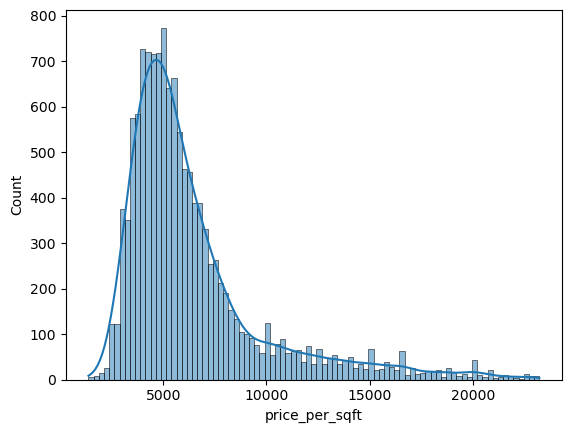

In [89]:
sn.histplot(df_no_outlier.price_per_sqft, kde=True)

In [90]:
#  On step(2) dataframe, use 4 standard deviation to remove outliers here Question 2 completed
df_no_outlier.price_per_sqft.describe()

count    13047.000000
mean      6449.328045
std       3487.670005
min       1379.000000
25%       4259.000000
50%       5415.000000
75%       7222.000000
max      23214.000000
Name: price_per_sqft, dtype: float64

In [ ]:
# 5. On step(2) dataframe, use zscore of 4 to remove outliers. This is quite similar to step (3) and 
#you will get exact same result

In [91]:
df2['zscore'] = (df2.price_per_sqft - df2.price_per_sqft.mean()) / df2.price_per_sqft.std()
df2.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_1648\1239446135.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['zscore'] = (df2.price_per_sqft - df2.price_per_sqft.mean()) / df2.price_per_sqft.std()


,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.715923
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.494722
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.569583
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.101099
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.582864


In [92]:
# zscore I can combine it by using or operation
df2[ (df2.zscore < -4) | (df2.zscore > 4)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274,7.150495
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333,6.440283
190,Bellandur,4 Bedroom,1200.0,5.0,325.0,4,27083,4.930994
733,Cunningham Road,4 BHK,5270.0,4.0,1250.0,4,23719,4.118633
760,other,9 Bedroom,600.0,9.0,190.0,9,31666,6.037725
...,...,...,...,...,...,...,...,...
13081,other,6 Bedroom,8000.0,6.0,2800.0,6,35000,6.842841
13094,other,4 Bedroom,1200.0,5.0,325.0,4,27083,4.930994
13127,other,4 Bedroom,1200.0,5.0,325.0,4,27083,4.930994
13185,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000,9.016218


In [50]:
#zscore  I can combine it by using and operation
no_outluier = df2[ (df2.zscore > -4) & (df2.zscore < 4)]
no_outluier.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.568839
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,0.075049
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.386405
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.123853
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.473922


In [51]:
no_outluier.price.describe()

count    12566.000000
mean        92.054084
std         64.262862
min         19.330000
25%         50.000000
50%         70.000000
75%        110.000000
max        360.000000
Name: price, dtype: float64